In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
data = pd.read_csv('../Data/raw_data.csv', index_col=0)

In [241]:
# Construct a dataframe with only the driver count data and the crash year
total_drvr_ct = [str(c) for c in data.columns if 'driver' in str(c)]
driver_data = data[total_drvr_ct]

driver_data.loc[:,'total_driver_count'] = driver_data.sum(axis=1)
driver_data.loc[:,'crash_year'] = data.crash_year
drivers_by_year = pd.DataFrame(driver_data.groupby(['crash_year']).sum())

drivers_by_year['minor_driver_count']=drivers_by_year['driver_count_16yr']\
+drivers_by_year['driver_count_17yr']

drivers_by_year['senior_driver_count'] = drivers_by_year['driver_count_65_74yr']\
+drivers_by_year['driver_count_75plus']

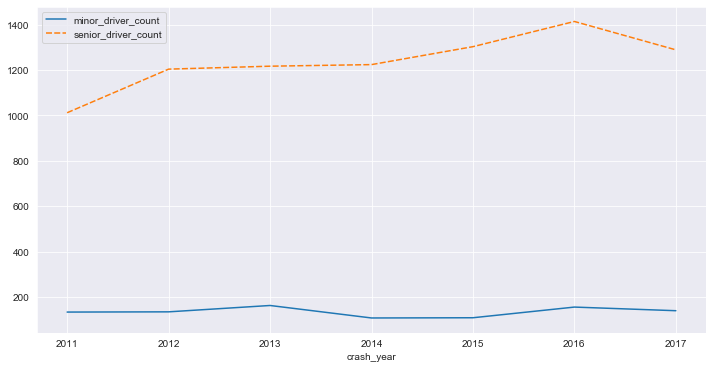

In [242]:
# Construct a time series plot of the number of minor drivers and the number of senior drivers
# involved in crashes
plt.figure(figsize=(12,6))
sns.lineplot(data=drivers_by_year[['minor_driver_count', 'senior_driver_count']])
plt.show()

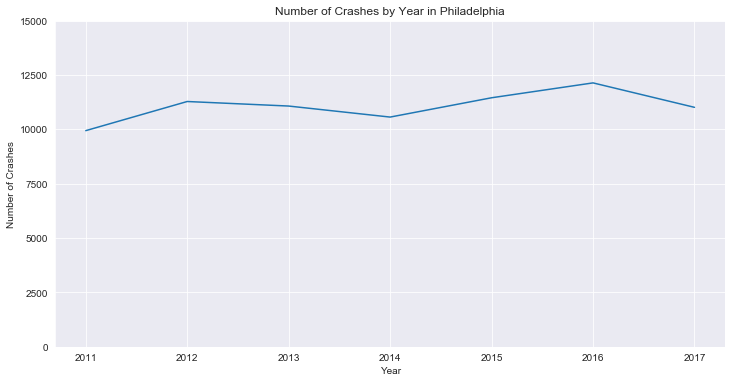

In [243]:
# Plot the number of crashes by year
years_data = data[['crn', 'crash_year']]
crashes_year = pd.DataFrame(years_data.groupby(['crash_year']).count()).reset_index()

plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.lineplot(data=crashes_year['crn'])
plt.title('Number of Crashes by Year in Philadelphia')
plt.xlabel('Year')
plt.xticks([0, 1, 2, 3, 4, 5, 6], np.array(crashes_year.crash_year))
plt.yticks(np.arange(0, 17500, 2500))
plt.ylabel('Number of Crashes')
plt.show()

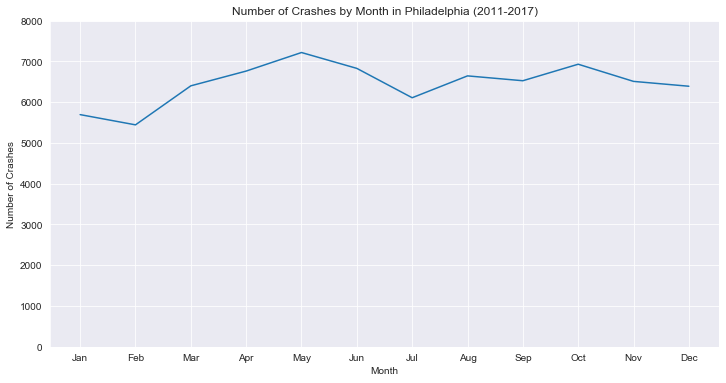

In [244]:
# Plot the number of crashes by month of the year
month_data = data[['crn', 'crash_month']]
crashes_month = pd.DataFrame(month_data.groupby('crash_month').count()).reset_index()
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.lineplot(data=crashes_month['crn'])
plt.title('Number of Crashes by Month in Philadelphia (2011-2017)')
plt.xlabel('Month')
plt.xticks(np.arange(0, 12, 1), month_list)
plt.yticks(np.arange(0, 9000, 1000))
plt.ylabel('Number of Crashes')
plt.show()

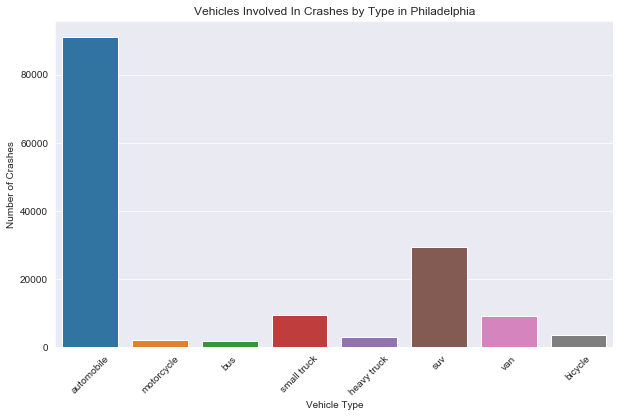

In [245]:
# Create a bar plot of the types of vehicles involved in crashes
# Construct a dataframe with only the vehicle types
vehicle_data = data[['automobile_count', 'motorcycle_count', 'bus_count', 'small_truck_count',
                  'heavy_truck_count', 'suv_count', 'van_count', 'bicycle_count']]
# Create a list of vehicle types for labels on the plot
v_types = [c.split('_')[0] if c.split('_')[1]=='count' 
           else c.split('_')[0] + ' ' + c.split('_')[1] for c in vehicle_data.columns]

vehicle_sums = [vehicle_data[c].sum() for c in vehicle_data.columns]
height = vehicle_sums
bars = v_types
y_pos = np.arange(len(bars))
x_pos = np.arange(8)

plt.figure(figsize = (10, 6))
sns.barplot(x=y_pos, y=height)

plt.xticks(x_pos, bars, rotation=45)
plt.title('Vehicles Involved In Crashes by Type in Philadelphia')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')
plt.show()

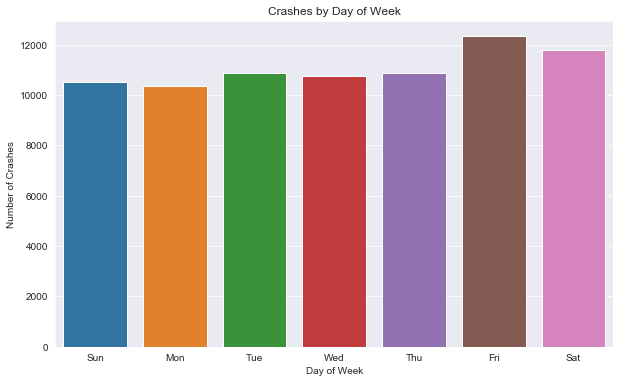

In [246]:
# Construct a bar plot of the crashes by day of week
day_data = data[['crn', 'day_of_week']]
crashes_days = pd.DataFrame(day_data.groupby('day_of_week').count()).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x=crashes_days.day_of_week, y=crashes_days.crn, data=crashes_days)

plt.title('Crashes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crashes')
plt.xticks(np.arange(0,7,1), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

plt.show()

In [247]:
# Format the data to plot the number of crashes by driver age group
driver_age = [c for c in data.columns if 'driver' in c]
driver_age_df = data[driver_age]
col_names = {'index': 'age', 0: 'total_drivers'}
driver_df = pd.DataFrame(driver_age_df.transpose().sum(axis=1)).reset_index().rename(columns = col_names)
driver_df['age'] = ['16', '17', '18', '19', '20', '50-64', '65-74', '75+']

In [248]:
young = ['16', '17', '18', '19', '20']
driver_df.loc[0] = ['16-20', driver_df.iloc[0:5]['total_drivers'].sum()]
driver_df = driver_df.drop([1, 2, 3, 4]).reset_index().drop('index', axis=1)
drivers_21_49 = data.vehicle_count.sum() - driver_df.total_drivers.sum()
driver_df.loc[4] = ['21-49', drivers_21_49]

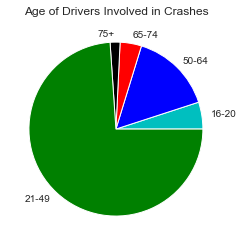

In [250]:
# Construct the plot
slices = list(driver_df.total_drivers)
labels = list(driver_df.age)
colors = ['c', 'b', 'r', 'k', 'g']

plt.pie(slices, labels=labels, colors=colors, startangle=0)
plt.title('Age of Drivers Involved in Crashes')
plt.show()